In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Part 1

### a)

In [2]:
G = nx.powerlaw_cluster_graph(300, 3, 0.3, seed=25)


In [3]:
# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))

Number of nodes:  300
Number of edges:  890
Average degree:  5.933333333333334
Density:  0.019843924191750278
Global clustering:  0.08005698005698006
Average clustering:  0.2018766932708116


In [4]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))

Number of nodes of the giant component:  300


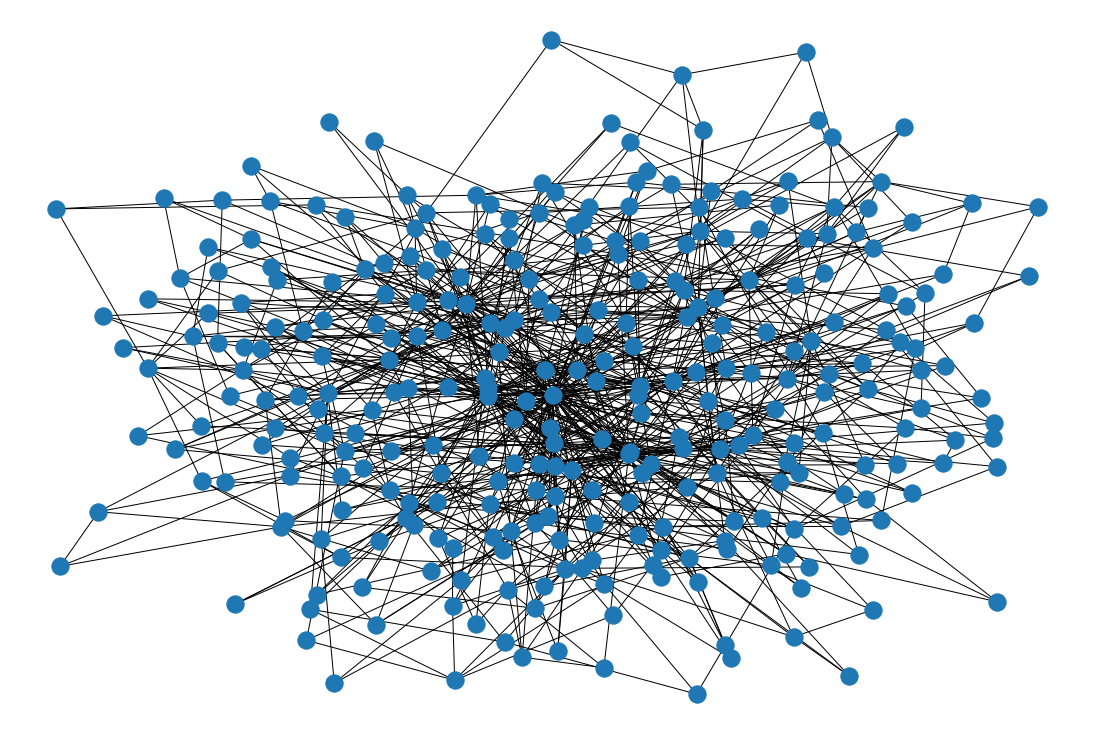

In [5]:
plt.figure( figsize=(15, 10))
nx.draw(G)
plt.show()

In [12]:
G_random_attack = G.copy()
G_betweenness_attack = G.copy()
G_pagerank_attack = G.copy()
G_high_dregree_attack = G.copy()
tot_nodes = nx.number_of_nodes(G)
f_list = np.arange(0,1.01,1/tot_nodes)

### b) - c)

#### Attack-1: Remove node with the highest betweeness

In [14]:
diameter_list_betweenness = np.zeros(len(f_list))
gaint_component_size_list_betweeness = np.zeros(len(f_list))
node_removed = 0
i =0

while nx.number_of_nodes(G_betweenness_attack) >=2: 
    #find node with highest betweenness
    
    betweenness_dict = nx.betweenness_centrality(G_betweenness_attack)
    max_betweenness_node = max(betweenness_dict, key=betweenness_dict.get)  # Just use 'min' instead of 'max' for minimum.
          ##Remove nodes with highest betweenness
    G_betweenness_attack.remove_node(max_betweenness_node)

    

    if not nx.is_connected(G_betweenness_attack) :
         #print("graph not connected! From now on the largest component will be considered as the graph")  
        G_betweenness_attack =  G_betweenness_attack.subgraph( sorted(nx.connected_components(G_betweenness_attack), key=len, reverse=True)[0]).copy()
    
    node_removed += 1

    gaint_component_size_list_betweeness[i] = nx.number_of_nodes(G_betweenness_attack)
    diameter_list_betweenness[i] = nx.diameter(G_betweenness_attack)
    i += 1

#### Attack-2: Remove node with the highest degree

In [8]:
diameter_list_deg = np.zeros(len(f_list))
gaint_component_size_list_deg = np.zeros(len(f_list))
node_removed = 0
i =0

while nx.number_of_nodes(G_betweenness_attack) >=2: 
    # degree of the nodes
    degree_dict = dict(G_high_dregree_attack.degree)
    # node with highest degree
    max_node_degree = max( degree_dict, key=degree_dict.get)

    #remove node with highest degree
    G_high_dregree_attack.remove_node(max_node_degree)

    if not nx.is_connected(G_high_dregree_attack):
        print("graph not connected! From now on the largest component will be considered as the graph")  
        G_high_dregree_attack =  G_high_dregree_attack.subgraph(sorted(nx.connected_components(G_high_dregree_attack), key=len, reverse=True)[0]).copy()
        
    node_removed += 1

    gaint_component_size_list_deg[i] = nx.number_of_nodes(G_betweenness_attack)
    diameter_list_deg[i] = nx.diameter(G_betweenness_attack)
    i += 1

Node:  1 - Betweenness Value:  72
Number of nodes of the giant component:  299
Diameter:  6


#### Attack-3: Remove a node at random

In [9]:
#pick random node
random_node = random.randint(0, nx.number_of_nodes(G)-1)
print("Node to remove: ", random_node)

#remove random node
G_random_attack.remove_node(random_node)

if not nx.is_connected(G_random_attack):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G_random_attack =  G_random_attack.subgraph(sorted(nx.connected_components(G_random_attack), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G_random_attack))
print("Diameter: ", nx.diameter(G_random_attack))

Node to remove:  10
Number of nodes of the giant component:  299
Diameter:  5


#### Attack-4: Remove node with the highest pagerank

In [10]:
# computing page rank
pageRank_dict = nx.pagerank(G_pagerank_attack)

#pick the node di maximun pagerank
max_pageRank_idx = max(pageRank_dict, key=pageRank_dict.get)  # Just use 'min' instead of 'max' for minimum.
print("Node: ", max_pageRank_idx, "- Pagerank Value: ", pageRank_dict[max_pageRank_idx])

#remove the node with highest pagerank
G_pagerank_attack.remove_node(max_pageRank_idx)

Node:  1 - Pagerank Value:  0.03540583090298903


In [11]:
if not nx.is_connected(G_pagerank_attack):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G_pagerank_attack =  G_pagerank_attack.subgraph(sorted(nx.connected_components(G_pagerank_attack), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))
print("Diameter: ", nx.diameter(G_pagerank_attack))

Number of nodes of the giant component:  300
Diameter:  6


### d)

# Part 2